# <center> Статистические тесты в контексте EDA

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о зарплатах в сфере Data Science за 2020–2022 годы.
Данные содержат следующие столбцы:
*   *work_year* — год, в котором была выплачена зарплата;
*   *experience_level* — опыт работы на этой должности в течение года со следующими возможными значениями:   
EN — Entry-level/Junior;
MI — Mid-level/Intermediate;
SE — Senior-level/Expert;
EX — Executive-level/Director.;
*   *employment_type* — тип трудоустройства для этой роли:  
PT — неполный рабочий день;
FT — полный рабочий день;
CT — контракт;
FL — фриланс;
*   *job_title* — роль, в которой соискатель работал в течение года;
*   *salary* — общая выплаченная валовая сумма заработной платы;
*   *salary_currency* — валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
*   *salary_in_usd* — зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
*   *employee_residence* — основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
*   *remote_ratio* — общий объём работы, выполняемой удалённо. Возможные значения:  
0 — удалённой работы нет (менее 20 %);
50 — частично удалённая работа;
100 — полностью удалённая работа (более 80 %);
*   *company_location* — страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
*   *company_size* — среднее количество людей, работавших в компании в течение года:  
S — менее 50 сотрудников (небольшая компания);
M — от 50 до 250 сотрудников (средняя компания);
L — более 250 сотрудников (крупная компания).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [230]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns



In [231]:
# загружаем датасет
data = pd.read_csv('C:/Users/l340/Desktop/Skillfactory/EDA/EDA-4(стат.тесты).ipynb/ds_salaries.csv',sep=',')
display(data)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [232]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [252]:
data['Объем удаленной работы']=data['remote_ratio']
data.drop('remote_ratio',axis=1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,Объем удаленной работы
0,2020,MI,FT,Data Scientist,79833,DE,DE,L,0
1,2020,SE,FT,Machine Learning Scientist,260000,JP,JP,S,0
2,2020,SE,FT,Big Data Engineer,109024,GB,GB,M,50
3,2020,MI,FT,Product Data Analyst,20000,HN,HN,S,0
4,2020,SE,FT,Machine Learning Engineer,150000,US,US,L,50
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,US,M,100
603,2022,SE,FT,Data Engineer,126000,US,US,M,100
604,2022,SE,FT,Data Analyst,129000,US,US,M,0
605,2022,SE,FT,Data Analyst,150000,US,US,M,100


## Описательный анализ данных

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропусков значений)

Проверим данные на наличие полных дубликатов:

In [234]:
# Удаляем неинформативные признаки, которые не будут участвовать в исследовании
data= data.drop('Unnamed: 0', axis=1)
data= data.drop('salary', axis=1)
data= data.drop('salary_currency', axis=1)

In [235]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))
# Удаляем дубликаты:
data=data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))


Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 9)


К числовым признакам относятся:  salary, salary_in_usd  
К категориальным признакам относятся: work_year,experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size.

Статистические характеристики признаков

In [236]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


In [237]:
data['job_title'].describe()

count                565
unique                50
top       Data Scientist
freq                 130
Name: job_title, dtype: object

In [238]:
data['experience_level'].describe()

count     565
unique      4
top        SE
freq      243
Name: experience_level, dtype: object

In [239]:
data['employment_type'].describe()

count     565
unique      4
top        FT
freq      546
Name: employment_type, dtype: object

In [ ]:
data['employee_residence'].describe()

count     565
unique     57
top        US
freq      295
Name: employee_residence, dtype: object

In [ ]:
data['company_location'].describe()

count     565
unique     50
top        US
freq      318
Name: company_location, dtype: object

In [ ]:
data['company_size'].describe()

count     565
unique      3
top         M
freq      290
Name: company_size, dtype: object

### Распределение зарплаты

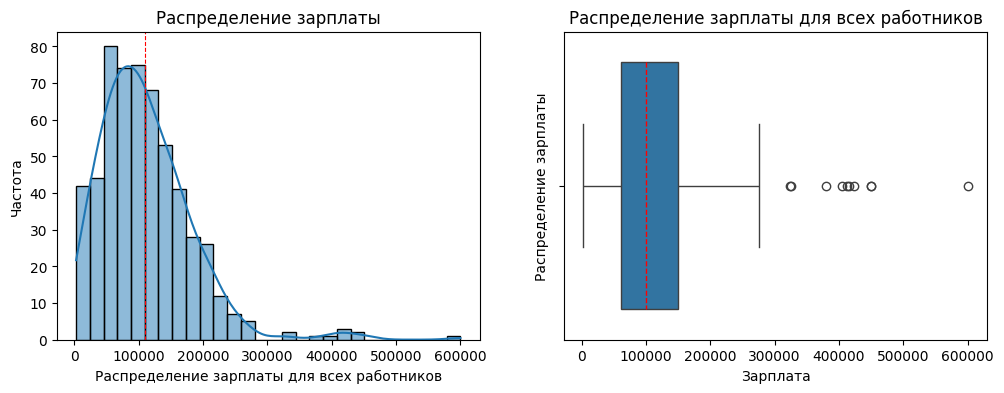

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

sns.histplot(data['salary_in_usd'],kde=True,ax=axes[0])
axes[0].set(xlabel='Распределение зарплаты для всех работников', ylabel='Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Зарплата',ylabel='Распределение зарплаты')
axes[1].set_title('Распределение зарплаты для всех работников')

plt.show()

*Распределение зарплаты отлично от нормального, имеются выбросы.*

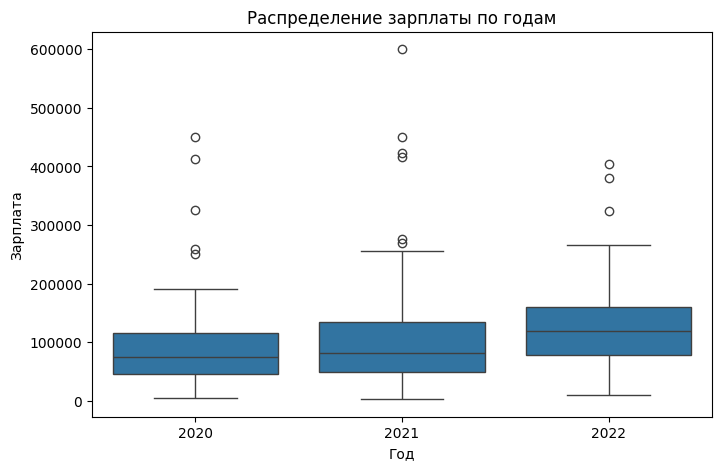

In [ ]:
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(data,x='work_year', y='salary_in_usd')
boxplot.set_title('Распределение зарплаты по годам')
boxplot.set_xlabel('Год')
boxplot.set_ylabel('Зарплата');

*На первый взгляд можно наблюдать ежегодный рост зарплат по всем должностям . Чтобы определить, является ли это  статистически значимым, в следующем разделе мы проведём статистическое тестирование.*

### Распределение зарплаты по годам для специалистов  Data Scientist

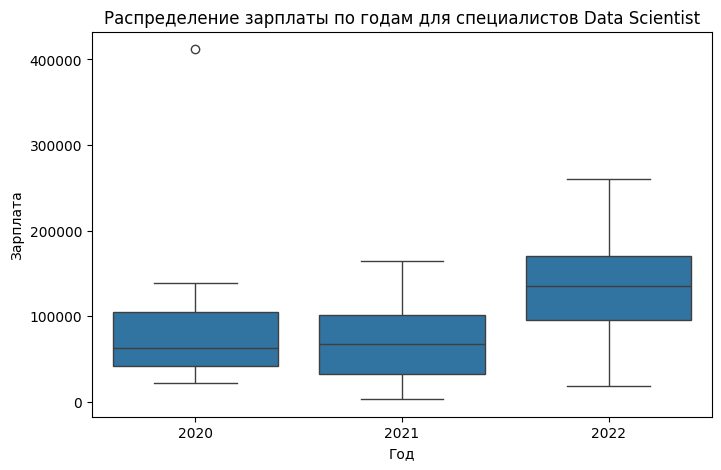

In [ ]:
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(data[data['job_title']=='Data Scientist'],x='work_year', y='salary_in_usd')
boxplot.set_title('Распределение зарплаты по годам для специалистов Data Scientist')
boxplot.set_xlabel('Год')
boxplot.set_ylabel('Зарплата');

In [ ]:

data_agg = data[data['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].describe().round(2)
print('Зарплата в зависимости от года для специалистов Data Scientist')
data_agg

Зарплата в зависимости от года для специалистов Data Scientist


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


In [ ]:
data_agg = data[data['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].median().round(2)
print('медианная зарплата в зависимости от года для специалистов Data Scientist')
data_agg

медианная зарплата в зависимости от года для специалистов Data Scientist


work_year
2020     62726.0
2021     67233.5
2022    135000.0
Name: salary_in_usd, dtype: float64

*На первый взгляд можно наблюдать ежегодный рост зарплат у специалистов Data Scientist . Чтобы определить, является ли это  статистически значимым, в следующем разделе мы проведём статистическое тестирование.*

### Соотношение зарплат Data Scientist и Data Engineer в 2022 году

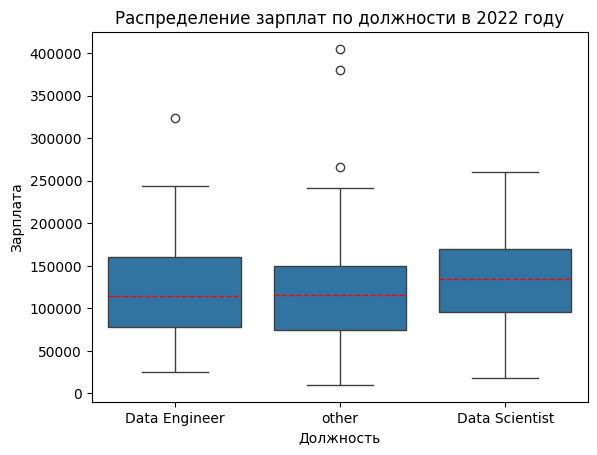

In [253]:
# сгруппируем категории, оставив только нужные для анализа
data['new_job_title']=data['job_title'].apply(lambda x: x if x in ['Data Scientist','Data Engineer'] else 'other')

ax = sns.boxplot(data[data['work_year']==2022], x='new_job_title', y='salary_in_usd', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Должность', ylabel='Зарплата')
plt.title('Распределение зарплат по должности в 2022 году')
plt.show();

In [ ]:
data_agg = data[data['work_year']==2022].groupby('new_job_title')['salary_in_usd'].describe().round(2)
print('Зарплаты Data Scientist и Data Engineer в 2022 году')
data_agg

Зарплаты Data Scientist и Data Engineer в 2022 году


,count,mean,std,min,25%,50%,75%,max
new_job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.00,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.00,260000.0
other,134.0,118152.44,62853.41,10000.0,75000.0,115717.0,150213.75,405000.0


*На первый взгляд зарплата Data Scientist выше зарплаты Data Engineer в 2022 году. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.*

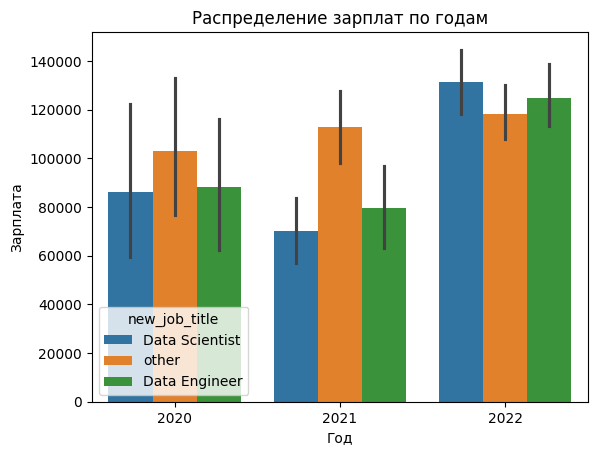

In [ ]:
# Дополнительно посмотрим зарплаты за всего годы
ax = sns.barplot(data, x='work_year', y='salary_in_usd',hue='new_job_title')
ax.set(xlabel='Год', ylabel='Зарплата')
plt.title('Распределение зарплат по годам')
plt.show()

*На первый взгляд  зарплата Data Engineer за 2020-2021 была выше зарплаты Data Scientist, но в 2022 году стала ниже. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.*

### Соотношение зарплаты специалистов Data Scientist в компаниях различных размеров

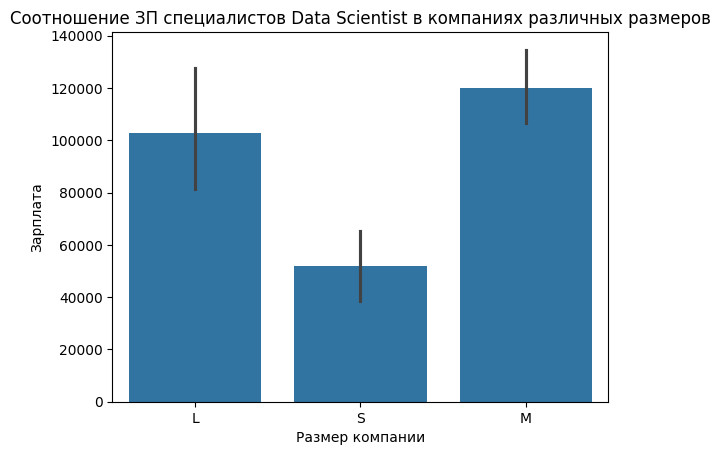

In [ ]:
ax = sns.barplot(data[data['job_title']=='Data Scientist'], x='company_size', y='salary_in_usd')
ax.set(xlabel='Размер компании', ylabel='Зарплата')
plt.title('Соотношение ЗП специалистов Data Scientist в компаниях различных размеров')
plt.show()

In [ ]:
data_agg = data[data['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].describe().round(2)
print('Соотношение ЗП специалистов Data Scientist в компаниях различных размеров')
data_agg

Соотношение ЗП специалистов Data Scientist в компаниях различных размеров


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


*На первый взгляд соотношение зарплаты специалистов Data Scientist в компаниях различных размеров: M > L > S. Чтобы определить, является ли это  статистически значимым, в следующем разделе мы проведём статистическое тестирование.*

### Соотношение между наличием должностей Data Scientist и Data Engineer и размером компании

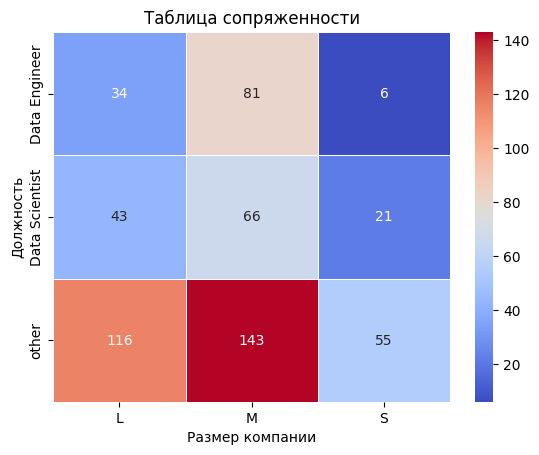

In [ ]:
cross_tab = pd.crosstab(index=data['new_job_title'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Должность')
plt.title('Таблица сопряженности')
plt.show()

*Согласно данным существует связь между наличием должностей Data Scientist и Data Engineer и размером компании, причем больше всего должностей Data Scientist и Data Engineer в средних компаниях. Чтобы определить, являются ли эти различия  статистически значимыми, в следующем разделе мы проведём статистическое тестирование.*

### Зависимость зарплаты от опыта работы и типа трудоустройства

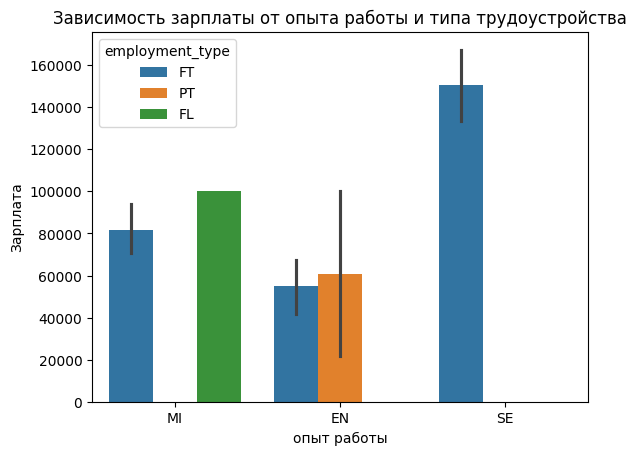

In [241]:
ax = sns.barplot(data[data['job_title']=='Data Scientist'], x='experience_level', y='salary_in_usd',hue='employment_type')
ax.set(xlabel='опыт работы', ylabel='Зарплата')
plt.title('Зависимость зарплаты от опыта работы и типа трудоустройства')
plt.show()

*Согласно данным неполный рабочий день (PT) предусмотрен только для неопытных сотрудников, преобладающий опыт работы Senior-level/Expert (SE), фриланс (FL) характерен для Mid-level/Intermediate (MI) сотрудников.*

### Зависимость зарплаты от страны проживания сотрудника и Общего объёма работы, выполняемой удалённо.

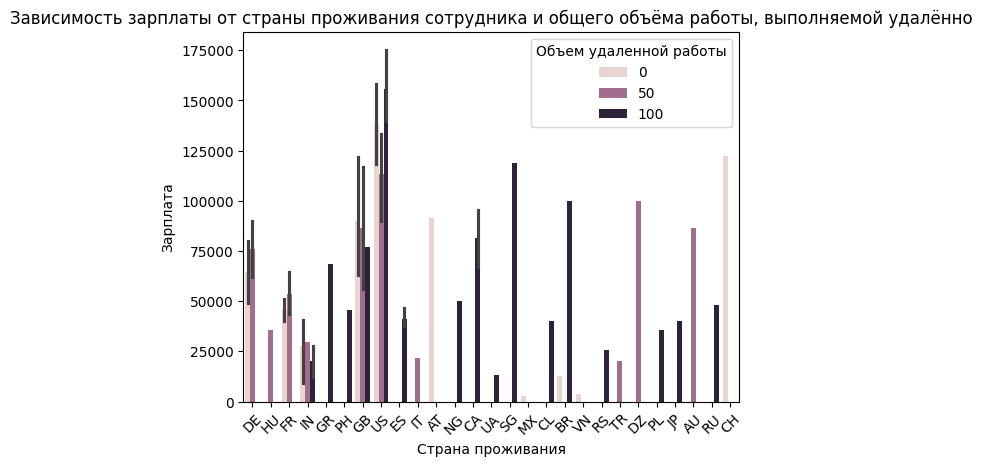

In [255]:
ax = sns.barplot(data[data['job_title']=='Data Scientist'], x='employee_residence', y='salary_in_usd',hue='Объем удаленной работы')
ax.set(xlabel='Страна проживания',ylabel='Зарплата')
plt.title('Зависимость зарплаты от страны проживания сотрудника и общего объёма работы, выполняемой удалённо')
plt.xticks(rotation=45)
plt.show()

### Зависимость зарплаты от страны работодателя и размера компании

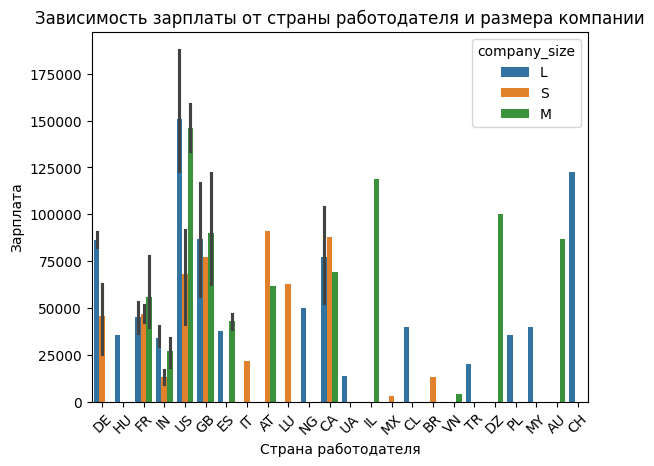

In [256]:
ax = sns.barplot(data[data['job_title']=='Data Scientist'], x='company_location', y='salary_in_usd',hue='company_size')
ax.set(xlabel='Страна работодателя',ylabel='Зарплата')
plt.title('Зависимость зарплаты от страны работодателя и размера компании')
plt.xticks(rotation=45)
plt.show()

Общий вывод по описательному анализу данных:  
на заработную плату влияет опыт работы, тип трудоустройства, должность,страна проживания сотрудника и работодателя, размера компании.

## Статистический анализ данных



In [ ]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплаты у специалистов Data Scientist за 2022 год ($μ_1$)   статистически меньше либо равен размеру зарплаты у специалистов Data Scientist за 2021 год  ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплаты у специалистов Data Scientist за 2022 год ($μ_1$) статистически больше, чем зарплаты у специалистов Data Scientist за 2021 год ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [ ]:
# значения страховых выплат

salary_2022 = data.loc[(data['job_title']=='Data Scientist') & (data['work_year']==2022), 'salary_in_usd']
salary_2021 = data.loc[(data['job_title']=='Data Scientist') & (data['work_year']==2021), 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('За 2022 год:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

print('За 2021 год:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

За 2022 год:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
За 2021 год:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [ ]:
# проводим тест
_, p = stats.ttest_ind(salary_2022, salary_2021, alternative='greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Наблюдается ежегодный рост зарплат у специалистов Data Scientist.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер  зарплаты Data Engineer в 2022 году ($μ_1$) статистически больше либо равен размеру зарплаты Data Scientist в 2022 году ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер  зарплаты Data Engineer в 2022 году ($μ_1$) статистически меньше, чем размер зарплаты Data Scientist в 2022 году ($μ_2$).
$$ H_1 : μ_1 < μ_2$$




**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [ ]:
# значения страховых выплат
salary_DS = data.loc[(data['job_title']=='Data Scientist') & (data['work_year']==2022), 'salary_in_usd']
salary_DE = data.loc[(data['job_title']=='Data Engineer') & (data['work_year']==2022), 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist:')
result = stats.shapiro(salary_DS)
decision_normality(result[1])

print('Для Data Engineer:')
result = stats.shapiro(salary_DE)
decision_normality(result[1])

Для Data Scientist:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер страховых выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [ ]:
# проводим тест
_, p = stats.mannwhitneyu(salary_DS, salary_DE, alternative='less')
decision_hypothesis(p)

p-value = 0.841
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что зарплата Data Scientist больше зарплаты Data Engineer.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: зарплаты специалистов Data Scientist в компаниях различных размеров не отличаются: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: зарплаты специалистов Data Scientist в компаниях различных размеров отличаются: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [ ]:
# значения страховых выплат
company_S = data.loc[(data['job_title']=='Data Scientist') & (data['company_size']=='S'), 'salary_in_usd']
company_M = data.loc[(data['job_title']=='Data Scientist') & (data['company_size']=='M'), 'salary_in_usd']
company_L = data.loc[(data['job_title']=='Data Scientist') & (data['company_size']=='L'), 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для небольшой компании:')
result = stats.shapiro(company_S)
decision_normality(result[1])

print('Для средней компании:')
result = stats.shapiro(company_M)
decision_normality(result[1])

print('Для крупной компании:')
result = stats.shapiro(company_L)
decision_normality(result[1])


Для небольшой компании:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для средней компании:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для крупной компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер зарплаты»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [ ]:
# проводим тест
_, p = stats.kruskal(company_S, company_M, company_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Зарплаты специалистов Data Scientist в компаниях различных размеров отличаются.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*:  между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [ ]:
cross_table = pd.crosstab(data['new_job_title'], data['company_size'])

cross_table

company_size,L,M,S
new_job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21
other,116,143,55


In [ ]:
# составляем таблицу сопряжённости
data=data[(data['new_job_title']=='Data Scientist')|(data['new_job_title']=='Data Engineer')]
cross_table = pd.crosstab(data['new_job_title'], data['company_size'])

cross_table

company_size
new_job_title


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует связь между наличием должностей Data Scientist и Data Engineer и размером компании.

## Итоговые результаты исследования

*   Наблюдается ежегодный рост зарплат у специалистов Data Scientist.
*   Нет оснований утверждать, что зарплата Data Scientist больше зарплаты Data Engineer.
*   Зарплаты специалистов Data Scientist в компаниях различных размеров отличаются.
*   Существует связь между наличием должностей Data Scientist и Data Engineer и размером компании.